Method to try to match lines, mainly in absorption, with known lines at different redshift. The lineid musr be identified first to discard wrong detections.

In [23]:
import sys
sys.path.append("/home/stephane/git/alma-calibrator/src")

import lineTools as lt
import pickle
import matplotlib.pyplot as pl

al = lt.analysisLines("/home/stephane/Science/RadioGalaxy/ALMA/absorptions/analysis/a/lineAll.db")

In [24]:
%matplotlib inline

We define the source to be scanned from the lineAll.db

In [25]:
def outputMatch(matches, minmatch = 5, mainLines = None):

    for m in matches:
        imax = len(m)
        ifound = 0

        redshift = m[0]
        
        for i in range(1,len(m)):
            if len(m[i]) > 0:
                    ifound += 1
                    
        if mainLines != None:
            ifound =0
            for i in range(1,len(m)):
                    for mainline in mainLines:
                        if len(m[i]) > 0:
                            for line in m[i]:
                                if line[0].find(mainline) != -1:
                                    ifound += 1
        
        if ifound >= minmatch:
            print("########################")
            print("## Redshift: %f"%(redshift))
            print("## Freq. matched: %d"%(ifound))
            print("##")
            print("## Formula Name E_K Frequency")
            print("##              (K)   (MHz)")
            for i in range(1,len(m)):
                if len(m[i]) > 0:
                    print("## Line:")
                    for line in m[i]:
                        print line
        
            print("##      \n###END###\n")

In [26]:
source = "J004916-445738"
redshift = 0.05
lineid = [5931, 6112, 6148, 6149]

Scan through the lines (lineid) matching with a local splatalogue.db. emax is the maximum energy of the upper level to restrain to low energy transitions...

In [27]:
m = al.scanningSplatRedshiftSourceLineid(lineid, zmin = -5e-4 , zmax = 0.055, dz = 1e-5,nrao = True, emax= 40., absorption = True, emission = True )

## Number of lines: 4
## Redshift scanning ...
## Connect to local splatalogue ...
## Redshift: -0.00050   (0.0% done)
### Lines found: 0
## Redshift: -0.00049   (0.0% done)
### Lines found: 0
## Redshift: -0.00048   (0.0% done)
### Lines found: 1
## Redshift: -0.00047   (0.1% done)
### Lines found: 0
## Redshift: -0.00046   (0.1% done)
### Lines found: 0
## Redshift: -0.00045   (0.1% done)
### Lines found: 1
## Redshift: -0.00044   (0.1% done)
### Lines found: 0
## Redshift: -0.00043   (0.1% done)
### Lines found: 1
## Redshift: -0.00042   (0.1% done)
### Lines found: 0
## Redshift: -0.00041   (0.2% done)
### Lines found: 0
## Redshift: -0.00040   (0.2% done)
### Lines found: 1
## Redshift: -0.00039   (0.2% done)
### Lines found: 0
## Redshift: -0.00038   (0.2% done)
### Lines found: 2
## Redshift: -0.00037   (0.2% done)
### Lines found: 0
## Redshift: -0.00036   (0.3% done)
### Lines found: 1
## Redshift: -0.00035   (0.3% done)
### Lines found: 1
## Redshift: -0.00034   (0.3% done)
#

In [28]:
redshift = []
lineDetected =[]
minmatch = 15

for l in m:
    redshift.append(l[0])
    
    ifound = 0
    
    for i in range(1,len(l)):
        if len(l[i]) > 0:
            ifound += 1
            
    if ifound >= minmatch:
        print("###Redshift: %f"%(l[0]))
        print("##")
        for line in l[1:-1]:
            if len(line) > 0:
                print line
        print("\n\n")
    
    
    lineDetected.append(ifound)

Plot the detected lines vs. the redshift.

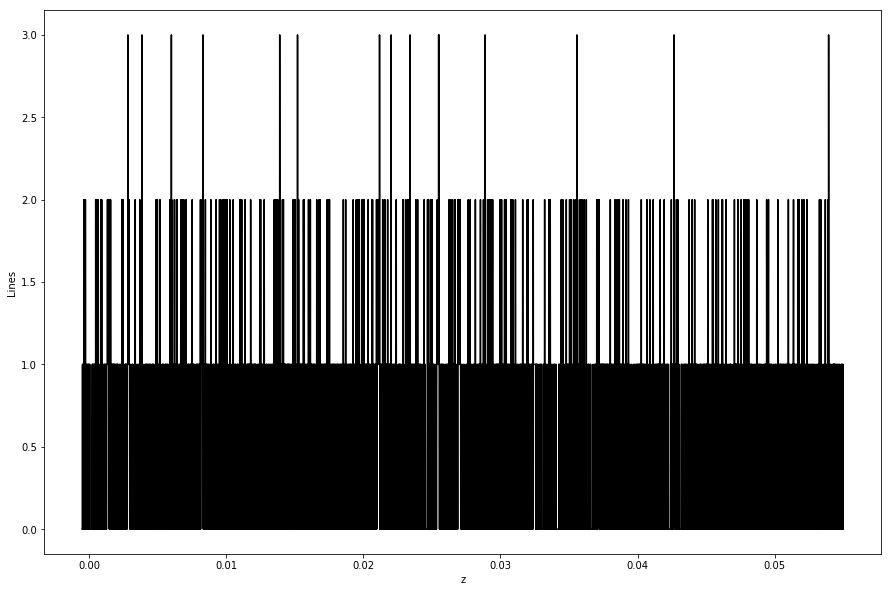

In [29]:
pl.figure(figsize=(15,10))
pl.xlabel("z")
pl.ylabel("Lines")
pl.plot(redshift, lineDetected, "k-")
pl.show()


In [30]:
## uncomment to save data in a pickle file
f = open("3c273-redshift-hires-scan.pickle","w")
pickle.dump(m,f )
f.close()


Display the matching transitions

In [32]:
mL = ['CO v=0','HCN','HCO+']
outputMatch(m, minmatch=3, mainLines = None)

########################
## Redshift: 0.002830
## Freq. matched: 3
##
## Formula Name E_K Frequency
##              (K)   (MHz)
## Line:
(u'Al(37)Cl v=0', u'Aluminum Monochloride', u'J= 8- 7,  F1=19/2-19/2,  F2= 8- 8', 24.5922651953224, 113860.5086, 431)
(u'Al(37)Cl v=0', u'Aluminum Monochloride', u'J= 8- 7,  F1=19/2-19/2,  F2= 9- 9', 24.5922672829813, 113860.5521, 431)
(u'Al(37)Cl v=0', u'Aluminum Monochloride', u'J= 8- 7,  F1=19/2-19/2,  F2=10- 9', 24.592276780629, 113860.75, 431)
(u'Al(37)Cl v=0', u'Aluminum Monochloride', u'J= 8- 7,  F1=19/2-19/2,  F2= 9-10', 24.5922769629992, 113860.7538, 431)
(u'Al(37)Cl v=0', u'Aluminum Monochloride', u'J= 8- 7,  F1=19/2-19/2,  F2=10-10', 24.592286460647, 113860.9517, 431)
(u'Al(37)Cl v=0', u'Aluminum Monochloride', u'J= 8- 7,  F1=15/2-11/2,  F2= 7- 7', 24.5921426173755, 113860.9524, 431)
(u'Al(37)Cl v=0', u'Aluminum Monochloride', u'J= 8- 7,  F1=15/2-11/2,  F2= 8- 7', 24.5921457080704, 113861.0168, 431)
(u'Al(37)Cl v=0', u'Aluminum Monochloride